# PISA Data Exploration

**Author:** Tran Anh Tong

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is used to examine how well students have learned the school curriculum and how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

Some questions:

* Does the age when a child begins learning the language the test was given in affect their performance?
* Do children in freer countries perform differently than those in less free countries?
* Does economic, social, and cultural status – advantage vs. disadvantage – relate to academic performance?

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Plot styles
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')


In [3]:
df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')

In [4]:
df_free = pd.read_csv('Freedom_in_the_World_2012.csv')

## Assessment

In [5]:
df.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
60573,60574,Brazil,0760000,BRA1954,Non-OECD,Brazil,0000241,05308,10,1,...,712.5606,649.999,649.999,649.999,196.7727,712.5606,11,1,0.1836,22NOV13
373433,373434,Peru,6040000,PER0003,Non-OECD,Peru,0000021,00547,10,1,...,87.4549,87.4549,29.1516,29.1516,29.1516,29.1516,58,2,0.1388,22NOV13
189981,189982,United Kingdom,8260000,GBR1227,OECD,United Kingdom (excl.Scotland),0000036,00865,12,1,...,4.9328,24.4622,4.285,22.7412,3.8614,4.4452,54,1,0.0208,22NOV13
15641,15642,United Arab Emirates,7840100,ARE0101,Non-OECD,United Arab Emirates,0000434,10899,10,1,...,4.1738,12.5213,12.5213,4.1738,12.5213,12.5213,43,2,0.2055,22NOV13
34621,34622,Australia,0360000,AUS0206,OECD,Australia,0000667,12471,10,1,...,15.6568,15.6568,15.1613,42.143,42.143,15.1613,11,2,0.1158,22NOV13
169275,169276,Spain,7240900,ESP0917,OECD,Spain,0000844,23693,9,1,...,94.5363,80.8373,27.3993,29.289,26.8122,32.2697,72,1,0.1493,22NOV13
399811,399812,Qatar,6340000,QAT0001,Non-OECD,Qatar,0000150,10561,9,1,...,0.5208,0.5068,1.5208,0.5068,0.5069,1.5625,62,2,0.0934,22NOV13
144155,144156,Denmark,2080000,DNK0003,OECD,Denmark,0000277,06054,9,1,...,6.9313,6.9313,20.7939,20.7939,6.9313,20.7939,35,1,0.2112,22NOV13
345143,345144,Mexico,4840000,MEX0307,OECD,Mexico,0001274,29441,10,5,...,2.4232,7.2696,2.4232,7.2696,2.4232,2.4232,23,1,0.0037,22NOV13
332258,332259,Mexico,4840000,MEX1957,OECD,Mexico,0000715,16556,9,1,...,31.3876,105.2406,105.2406,31.3876,31.3876,105.2406,17,2,0.05,22NOV13


In [6]:
df.shape

(485490, 636)

In [8]:
df_free.sample(10)

,country,SUBNATIO,political_rights,civil_liberties,freedom_status
43,Norway,5780000,1,1,F
0,Albania,80000,3,3,PF
14,Costa Rica,1880000,1,1,F
66,Spain,7241200,1,1,F
22,Greece,3000000,2,2,F
76,United Arab Emirates,7840000,6,6,NF
71,Sweden,7520000,1,1,F
75,Turkey,7920000,3,4,PF
46,Poland,6160000,1,1,F
67,Spain,7241300,1,1,F


In [9]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
country             86 non-null object
SUBNATIO            86 non-null int64
political_rights    86 non-null int64
civil_liberties     86 non-null int64
freedom_status      86 non-null object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


### What is the structure of your dataset?

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain string values that represent a scale (e.g. "Never" -> "Every day"). 

### What are the main feature(s) of interest in your dataset?

The features of interest from the PISA dataset to me are primarily:

* `NC` - country code (there is another code called CNT but that seems to include sub-regions, such as Florida and Massachusetts)
* `ST04Q01` - the student's gender (Male or Female)
* `PV1MATH-PV5MATH` - plausible values that represent scores on the mathematic section
* `PV1READ-PV5READ` - plausible values that represent scores on the reading section
* `PV1SCIE-PV5SCIE` - plausible values that represent scores on the science section
* `EC06Q01` - the year the student began learning the language the test was given in
* `ESCS` - a single index that combines several economic, social and cultural status factors. It is expressed as +/- standard deviations from the mean of population (where 0 = mean). The index of ESCS was used first in the PISA 2000 analysis and at that time was derived from five indices: highest occupational
status of parents (HISEI), highest educational level of parents (in years of education according to ISCED), family wealth,
cultural possessions and home educational resources (all three WLEs based on student reports on home possessions). The ESCS scores were obtained as component scores for the first principal component with zero being the score of an average OECD student and one being the standard deviation across equally weighted OECD countries.

And from the _Freedom House_ dataset I will be using:

* `political_rights` - degree of a country's political freedom, scale of 1=most free to 7=least free
* `civil_liberties` - degree of a country's civil liberties, scale of 1=most free to 7=least free
* `freedom_status` - a single overall rating of the country's freedom, F, PF, and NF stand for Free, Partly Free, and Not Free

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For my assessment, I will be using `ESCS` to represent student economic, social, and cultural status. I will do feature engineering to create new values to average each of the 5 math, reading, and science tests into single scores for each subject. I will also be looking at these factors against the _Freedom House_ freedom scores.

## Cleaning

In [10]:
# Make a copy
df_clean = df.copy()

In [11]:
# Trim leading spaces from the country names
df_clean['NC'] = df_clean['NC'].apply(lambda x: x.strip())

Now I am going to join the Freedom House data

In [12]:
df_free['SUBNATIO']=df_free['SUBNATIO'].astype(str)

In [13]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='SUBNATIO', right_on='SUBNATIO')
df_clean.drop(columns=['country'], inplace=True)

In [14]:
df_clean['civil_liberties'].corr(df_clean['political_rights'])

0.9297825648181567

The `civil_liberties` and `political_rights` values are very highly positively correlated, so I'm only going to use `civil_liberties` in my analysis. A value that reflects individual freedom is most relevant to individual academic performance.

### Math/Reading/Science/Overall Literacy Scores

From the [PISA Data Visualization Contest instructions](https://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm): "Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: `PV1MATH-PV5MATH` (for math), `PV1READ-PV5READ` (for reading) and `PV1SCIE-PV5SCIE` (for science). For given area all five values PV1-PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1."

Based on this, I decided to use the average of each of the five scores in each category as an overall "literacy" value. I then compute the average of *all* questions to stand as an overall literacy score.

In [15]:
df_clean['PV1MATH']= df_clean['PV1MATH'].astype(float)
df_clean['PV2MATH']= df_clean['PV2MATH'].astype(float)
df_clean['PV3MATH']= df_clean['PV3MATH'].astype(float)
df_clean['PV4MATH']= df_clean['PV4MATH'].astype(float)
df_clean['PV5MATH']= df_clean['PV5MATH'].astype(float)

In [16]:
df_clean['PV1READ']= df_clean['PV1READ'].astype(float)
df_clean['PV2READ']= df_clean['PV2READ'].astype(float)
df_clean['PV3READ']= df_clean['PV3READ'].astype(float)
df_clean['PV4READ']= df_clean['PV4READ'].astype(float)
df_clean['PV5READ']= df_clean['PV5READ'].astype(float)

In [17]:
df_clean['PV1SCIE']= df_clean['PV1SCIE'].astype(float)
df_clean['PV2SCIE']= df_clean['PV2SCIE'].astype(float)
df_clean['PV3SCIE']= df_clean['PV3SCIE'].astype(float)
df_clean['PV4SCIE']= df_clean['PV4SCIE'].astype(float)
df_clean['PV5SCIE']= df_clean['PV5SCIE'].astype(float)

In [18]:
#Each score is scaled to a mean of 500 and a standard deviation of 100

# Average of the five MATH assessment scores
df_clean['math_literacy'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH']) / 5)

# Average of the five READING assessment scores
df_clean['read_literacy'] = (
    (df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] +
     df_clean['PV4READ'] + df_clean['PV5READ']) / 5)

# Average of the five SCIENCE assessment scores
df_clean['sci_literacy'] = (
    (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df_clean['PV3SCIE'] +
     df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 5)

# Average of all assessment scores
df_clean['overall_literacy'] = (df_clean['math_literacy']+df_clean['read_literacy']+df_clean['sci_literacy'])/3

### Age Started Learning Language

In [19]:
# EC06Q01 = age started learning
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '7 to 9 years',
       '13 years or older', '10 to 12 years'], dtype=object)

In [20]:
# Convert the EC06Q01 field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)

In [21]:
# Test that the ordered dict dtype worked
df_clean['EC06Q01'].unique()

[NaN, 0 to 3 years, 4 to 6 years, 7 to 9 years, 13 years or older, 10 to 12 years]
Categories (5, object): [0 to 3 years < 4 to 6 years < 7 to 9 years < 10 to 12 years < 13 years or older]

### Advantaged/Disadvantaged Status

I am considering a student to be "disadvantaged" if their ESCS score is -1 or more stdevs below the mean and "advantaged" if their scores is +1 stdev or more above the mean.

In [22]:
df_clean['ESCS']= df_clean['ESCS'].astype(float)

In [23]:
df_clean['disadvantaged'] = df_clean['ESCS'].dropna().apply(lambda x: 1
                                                            if x <= -1 else 0)

df_clean['advantaged'] = df_clean['ESCS'].dropna().apply(lambda x: 1
                                                            if x >= 1 else 0)

### Remove unused columns

Our dataframe is massive which can make it unwieldly to analyze. We are going to reduce it to only those columns we will be using in our analysis.

In [24]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01', 'overall_literacy',
    'math_literacy', 'read_literacy', 'sci_literacy', 'civil_liberties',
    'disadvantaged', 'advantaged'
]]

In [25]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_start_learn',
    'ST04Q01': 'gender'
},
                inplace=True)


In [26]:
df_clean.sample(10)

,student_id,country,ESCS,age_start_learn,gender,overall_literacy,math_literacy,read_literacy,sci_literacy,civil_liberties,disadvantaged,advantaged
212974,30073,Italy,-0.58,NaN,Male,482.835913,502.42252,461.34074,484.74448,1,0.0,0.0
267738,09724,Mexico,-1.39,NaN,Male,421.880800,388.69760,432.39052,444.55428,3,1.0,0.0
191088,08187,Italy,-1.69,NaN,Female,434.791307,436.52436,422.73580,445.11376,1,1.0,0.0
152804,03592,Hong Kong-China,-1.24,NaN,Male,576.478933,644.96808,522.04800,562.42072,2,1.0,0.0
244781,01666,Luxembourg,-0.92,7 to 9 years,Female,486.951407,465.03350,528.14074,467.67998,1,0.0,0.0
326512,00672,Portugal,-0.80,NaN,Male,572.485467,567.85324,544.10148,605.50168,1,0.0,0.0
280056,22042,Mexico,0.06,NaN,Female,424.172813,367.97788,439.09856,465.44200,3,0.0,0.0
143200,09465,United Kingdom (Scotland),-0.51,NaN,Female,488.621373,446.26108,516.86154,502.74150,1,0.0,0.0
314102,03195,New Zealand,-0.81,NaN,Male,295.399780,301.84608,279.29920,305.05406,1,0.0,0.0
359209,04427,Romania,0.93,NaN,Female,451.291547,510.44558,414.63384,428.79522,2,0.0,0.0


In [27]:
# Save a copy of the cleaned dataframe
df_clean.to_csv('pisa2012_clean.csv')

## Univariate Exploration

In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Which countries did the students come from?

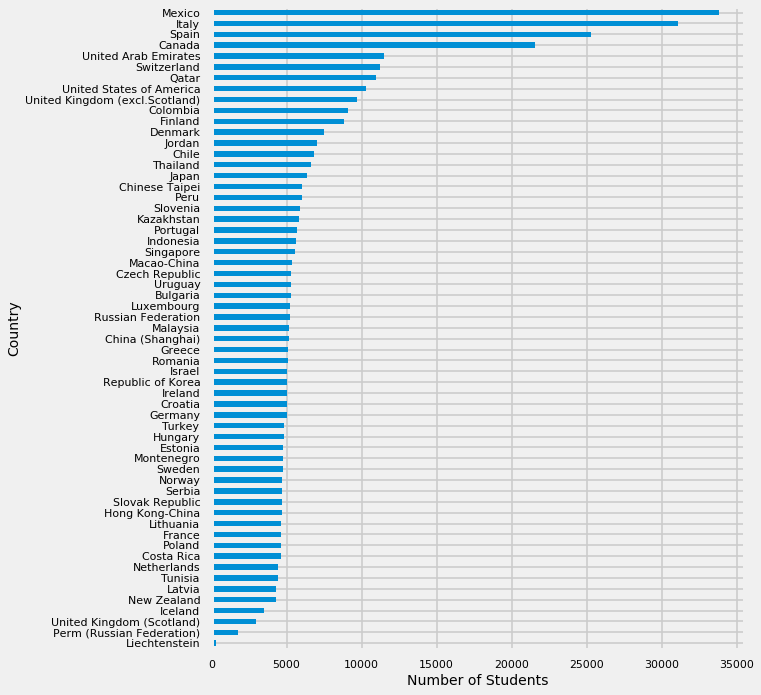

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
df_clean['country'].value_counts(ascending=True).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of Students", fontsize=14)
plt.show()
fig.savefig("students-by-country.png")

### Which countries have the highest percentage of disadvantaged students?

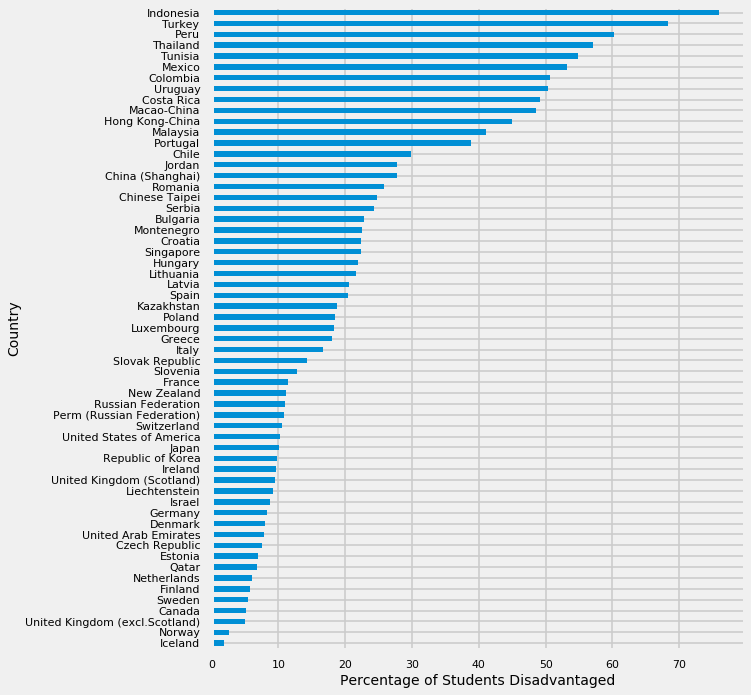

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('disadvantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Disadvantaged", fontsize=14)
plt.show()
fig.savefig("disadvantaged-students-by-country.png")

### Which countries have the highest percentage of advantaged students?

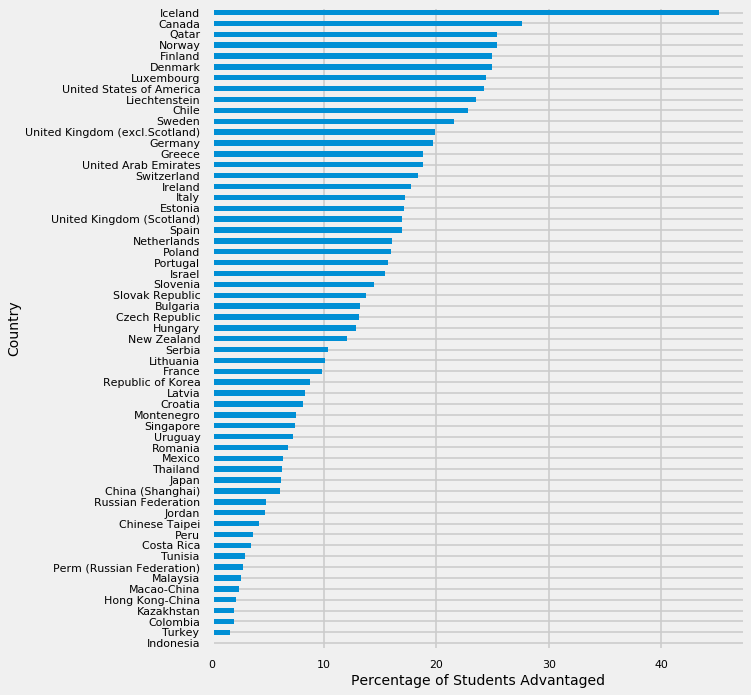

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('advantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Advantaged", fontsize=14)
plt.show()
fig.savefig("advantaged-students-by-country.png")

### Age Started Learning Language

In [32]:
df_clean['age_start_learn'].value_counts(normalize = True)*100

0 to 3 years         63.666063
4 to 6 years         23.359688
7 to 9 years          7.749959
10 to 12 years        3.206501
13 years or older     2.017789
Name: age_start_learn, dtype: float64

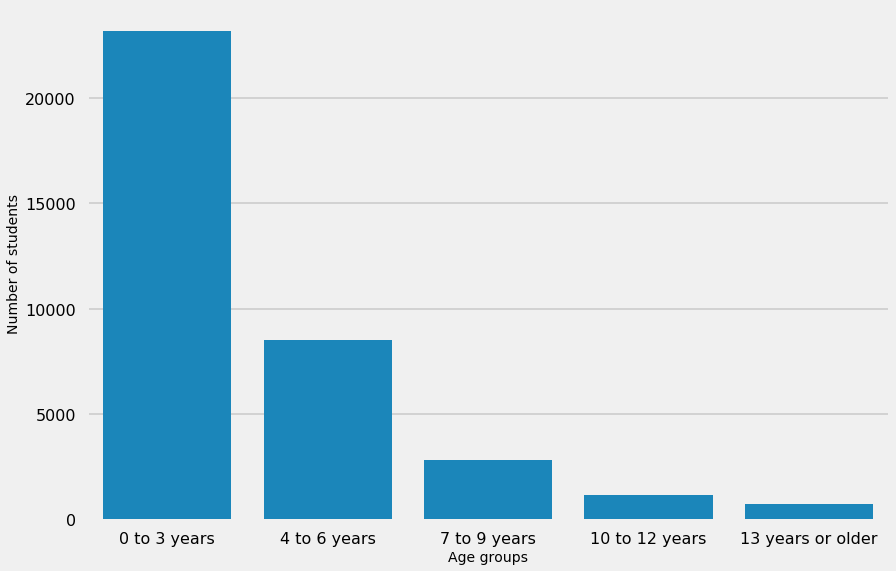

In [36]:
base_color = sns.color_palette()[0]
fig, ax = plt.subplots()
sns.countplot(data=df_clean, x='age_start_learn', color=base_color)
ax.set_ylabel("Number of students", fontsize=14)
ax.set_xlabel("Age groups", fontsize=14)
plt.show()
fig.savefig("age-started-learning.png")

### Math/Reading/Science Scores Distribution

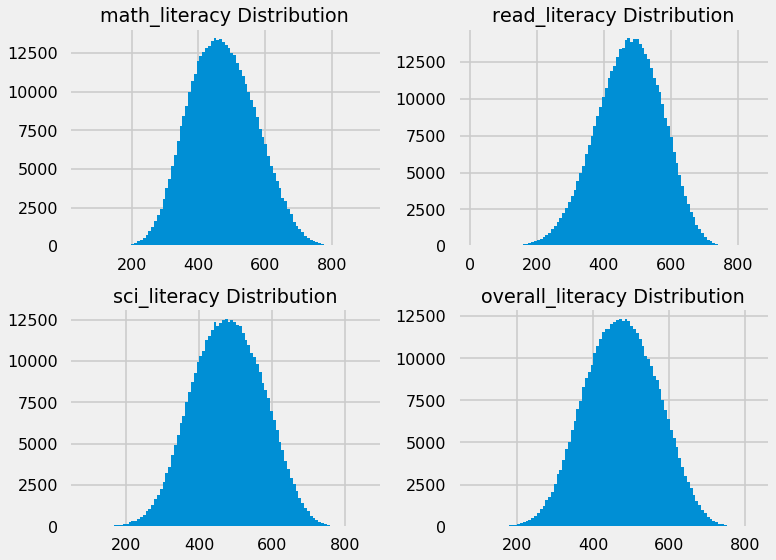

In [42]:
# Function for plotting multiple histograms from here:
# https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=100, ax=ax)
        ax.set_title(var_name + " Distribution")
    fig.set_size_inches(11, 8)
    fig.tight_layout() 
    plt.show()


draw_histograms(df_clean, 
                ['math_literacy', 
                 'read_literacy', 
                 'sci_literacy',
                 'overall_literacy'], 
                2, 2)


As expected and described in the PISA literature, each of these scores follows a standard distribution and are centered at approximately 500.

## Bivariate Exploration

In [43]:
numeric_vars = ['ESCS', 'overall_literacy', 'math_literacy', 'read_literacy',
    'sci_literacy', 'civil_liberties']

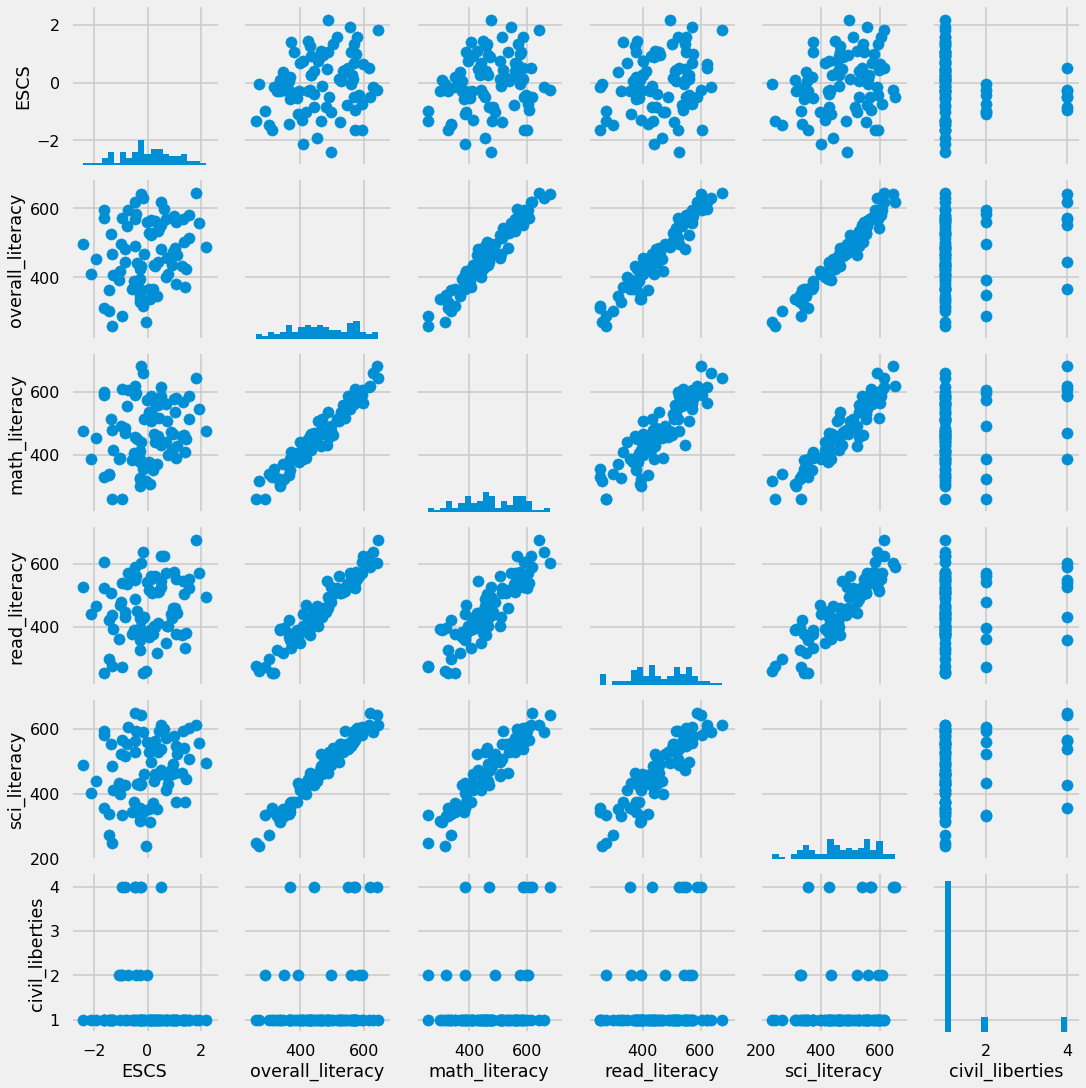

In [45]:
# plot matrix: sample 1000 rows so that plots are clearer and they render faster
samples = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_samp = df_clean.loc[samples, :]

g = sns.PairGrid(data=df_samp.dropna(), vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()


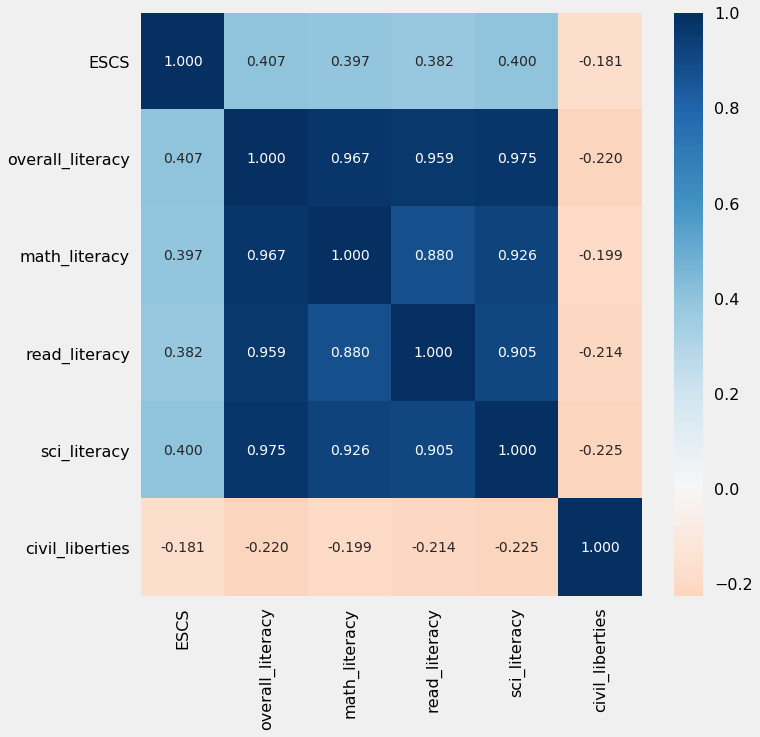

In [44]:
# correlation plot
plt.figure(figsize=[10, 10])
sns.heatmap(df_clean[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='RdBu',
           center=0)
plt.show()

We can see that there is quite a bit of correlation between the math, reading, and science literacy scores. ESCS has medium correlation with the academic scores. Civil liberties appears to be weakly negatively correlated with the academic scores (in other words, as countries become less free - higher scores - literacy scores decline). We do not yet know whether that is statistically significant, we will determine that later.

### Relationship between Overall Literacy and Civil Liberties

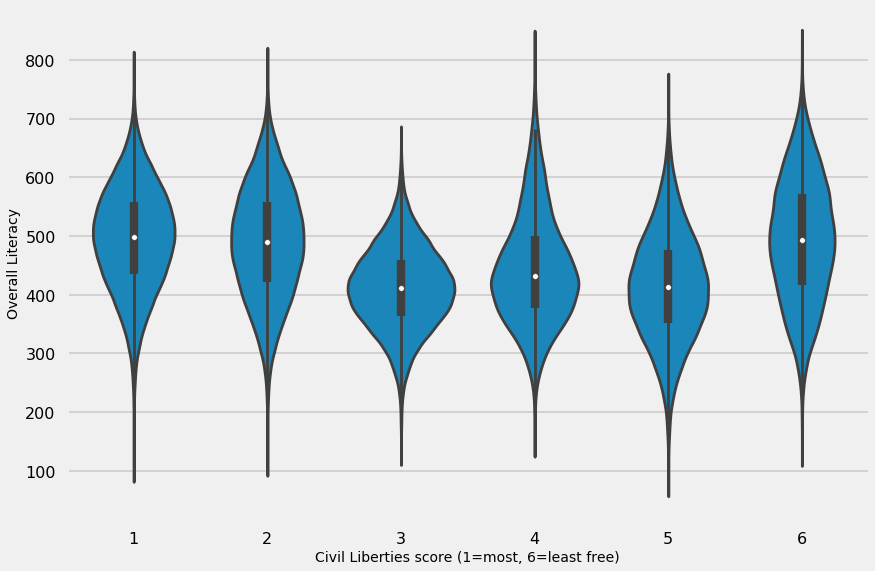

In [48]:
fig, ax = plt.subplots()
sns.violinplot(data=df_clean,
            x='civil_liberties',
            y='overall_literacy',
            color=base_color)
ax.set_ylabel("Overall Literacy", fontsize=14)
ax.set_xlabel("Civil Liberties score (1=most, 6=least free)", fontsize=14)
plt.show()
fig.savefig("overall-literacy-civil-liberties.png")

When we look at overall literacy by civil liberties category (1 = most free, 6 = least free) we can see that the most and least free countries seem to perform the best, with a slight decline from most to least free in the middle range (2-5).

### Relationship between Overall Literacy and Economic, Social, Cultural Opportunity

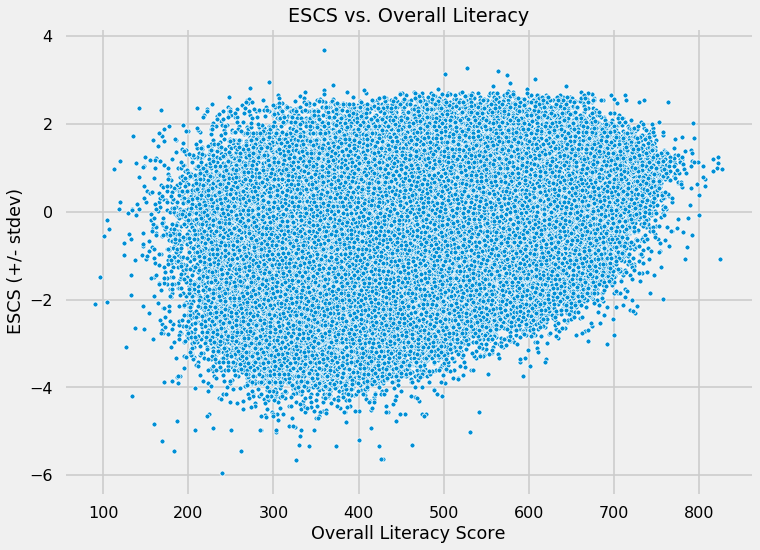

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=df_clean,
                x='overall_literacy',
                y='ESCS',
                s=25,
                palette='RdBu_r')
plt.title("ESCS vs. Overall Literacy")
plt.ylabel("ESCS (+/- stdev)")
plt.xlabel("Overall Literacy Score")
plt.show()

In [50]:
# Overall literacy scores against ESCS correlation
df_clean['ESCS'].corr(df_clean['overall_literacy'])

0.40657652905333325

ESCS has a medium positive correlation with overall literacy.

In [52]:
# Civil liberities scores against ESCS correlation
df_clean['ESCS'].corr(df_clean['civil_liberties'])

-0.18139967265082926

ESCS has a weak negative correlation to civil liberties (meaning less free countries tend to have lower ESCS).

### Relationship between Reading Literacy and Age Started Learning

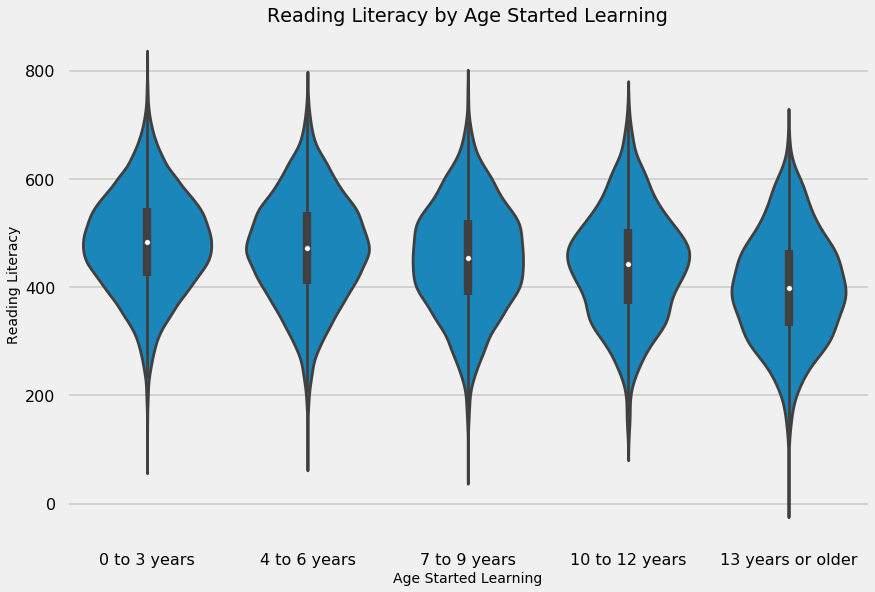

In [53]:
fig, ax = plt.subplots()
sns.violinplot(data=df_clean,
               x='age_start_learn',
               y='read_literacy',
               color=base_color)
ax.set_ylabel("Reading Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning", fontsize=14)
ax.set_title("Reading Literacy by Age Started Learning")
plt.show()
fig.savefig("read-literacy-age-started-learning.png")

From a visual inspection, it appears that reading literacy declines the longer a student goes before starting to learn. We might expect that since students were age 15 when they took the exam. Students in the 13 years and older category would have been studying the test language for no more than 2 years.

### Relationship between Disadvantage/Advantage and Overall Literacy

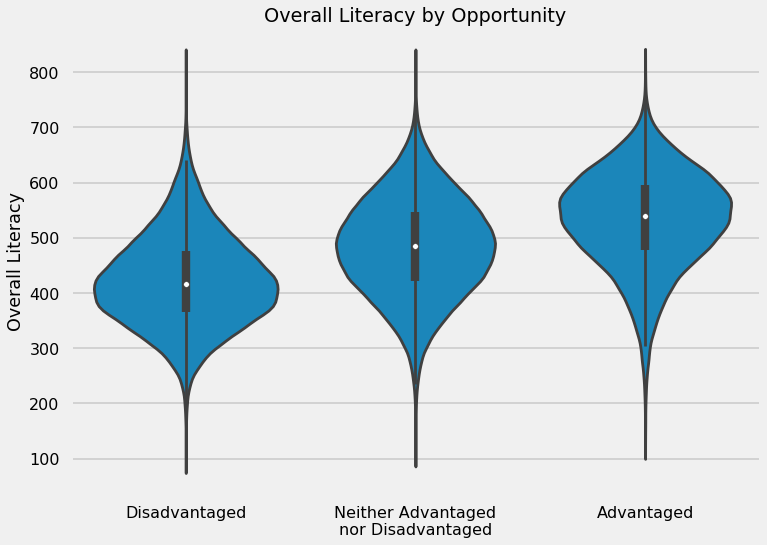

In [57]:
df1 = pd.DataFrame(df_clean.query('disadvantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Disadvantaged')
df2 = pd.DataFrame(df_clean.query('advantaged == 0 and disadvantaged == 0'),
                   columns=['overall_literacy'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df3 = pd.DataFrame(df_clean.query('advantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Advantaged')

cdf = pd.concat([df1, df2, df3])

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(x='opp', y='overall_literacy', data=cdf, color = base_color)
ax.set_xlabel(None)
ax.set_ylabel("Overall Literacy")
ax.set_title("Overall Literacy by Opportunity")
plt.show()
fig.savefig("overall-literacy-by-opportunity.png")

We can see the significant difference in overall academic literacy based on opportunity status. Disadvantaged students seem to have their scores weighted down, pulled below the median of 500. Advantaged students, on the other hand, appear to have their scores pulled up by a force from above.

## Multivariate Exploration

### Relationship between Gender, Age Started Learning Language, and Reading Literacy

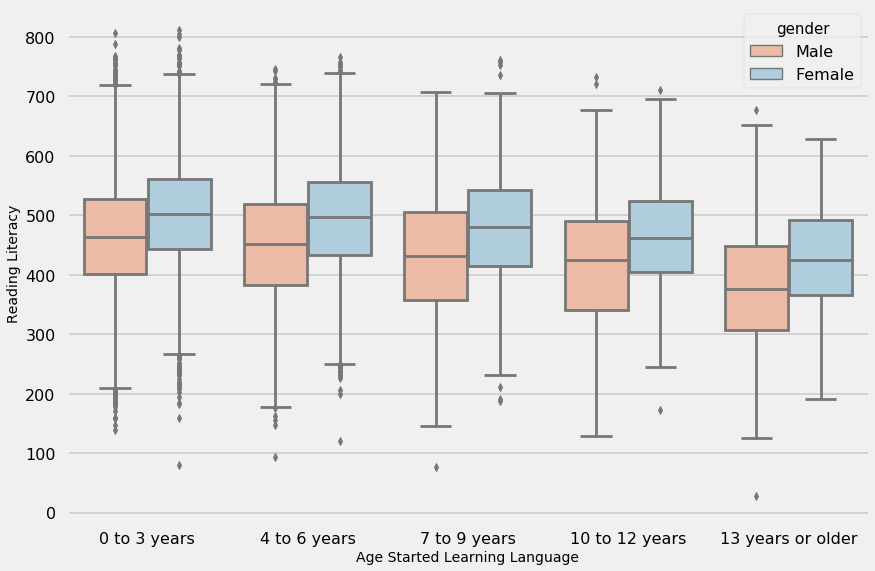

In [58]:
fig, ax = plt.subplots()
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='read_literacy',
            palette='RdBu',
            hue='gender')
ax.set_ylabel("Reading Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)
plt.show()
fig.savefig("read-literacy-gender-age-started-learning.png")

Here we observe again that reading performance appears to decline the later a student learned the test language. Keep in mind that the test subjects were 15-year-olds, meaning that students who only started learning the test language at 13 years or older had fewer than two years of familiarity with the language at test time.

Male students appear to perform worse overall than female students, and the performance gap between female and male students seems to increase the later students first began learning the language.

### Relationship between ESCS, Age Started Learning, and Reading Literacy

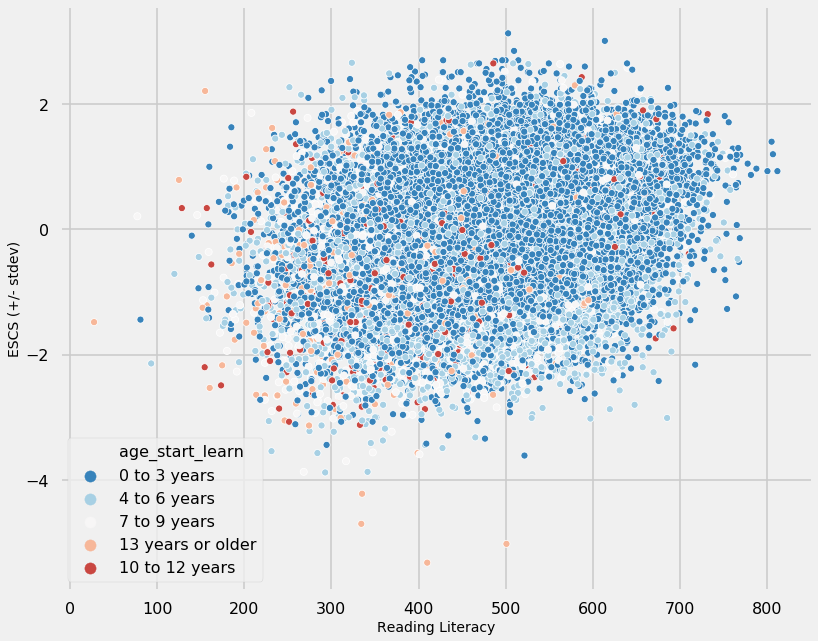

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='read_literacy',
                y='ESCS',
                palette="RdBu_r",
                hue='age_start_learn',
                s=50)
ax.set_xlabel("Reading Literacy", fontsize=14)
ax.set_ylabel("ESCS (+/- stdev)", fontsize=14)
plt.show()

We can see several points for 13 years or older in the lower-left of our plot, both performing poorly on the literacy and below the mean ESCS (disadvantaged).

### Relationship between Country, Overall Literacy, and Civil Liberties

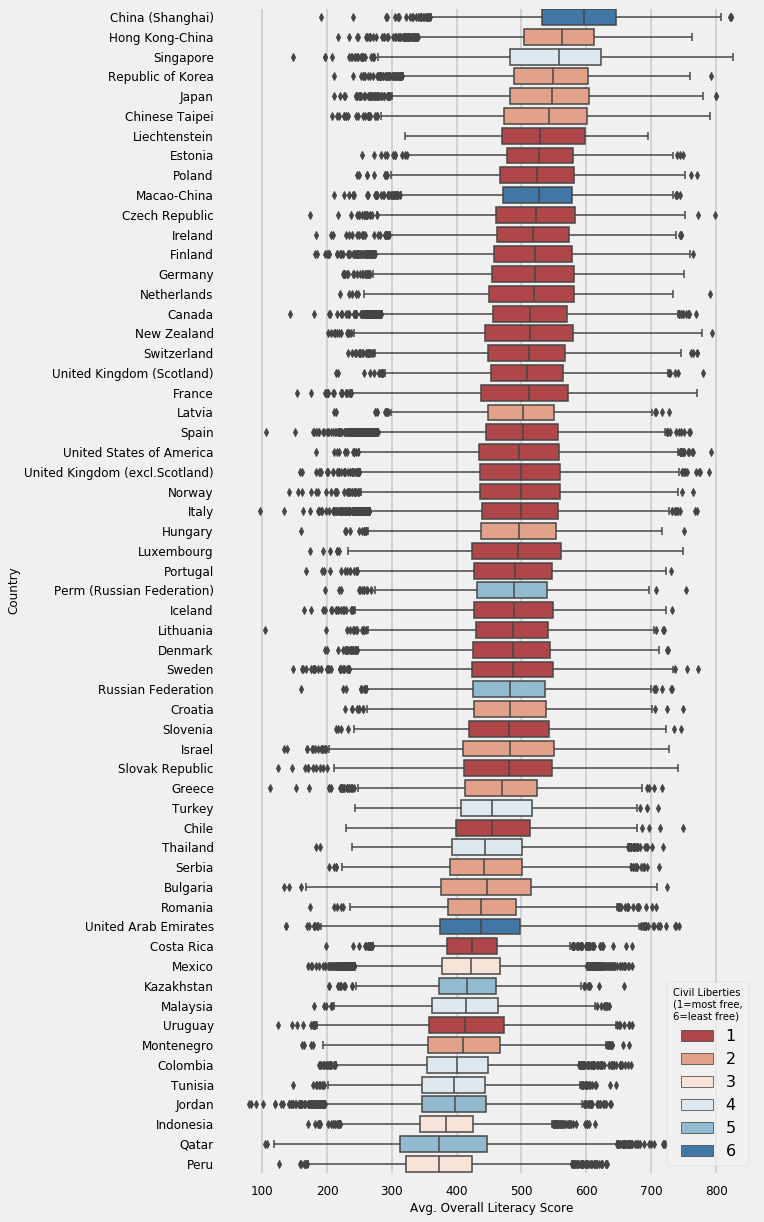

In [60]:
cnt_sort = df_clean.groupby('country')['overall_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 20)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_literacy',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1.5)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("Avg. Overall Literacy Score", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=12)
plt.show()
fig.savefig("overall-literacy-country.png")

### Relationship between Country, ESCS, and Civil Liberties

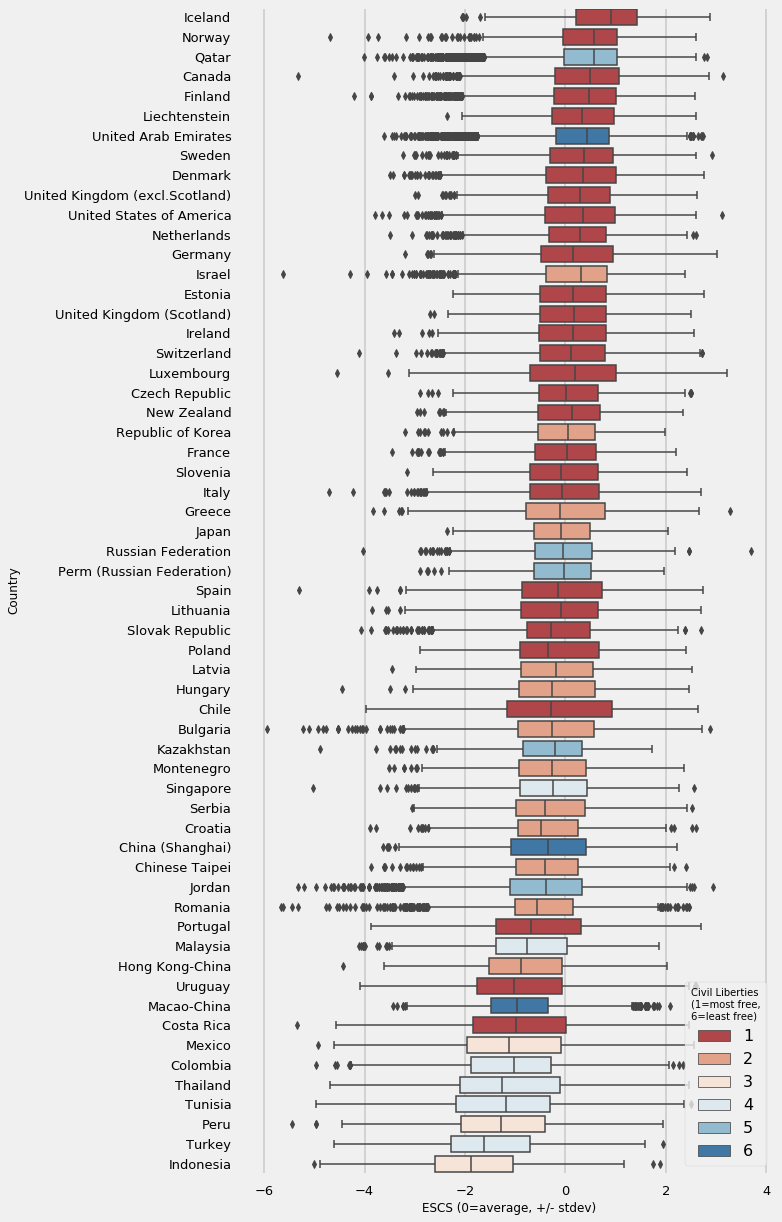

In [70]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna()

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 20)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu',
            hue='civil_liberties',
            width=0.8,
            linewidth=1.5)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='lower right', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
plt.show()
fig.savefig("escs-country.png")